In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import norm
import pandas as pd
import random
from scipy.spatial.distance import cdist

---
## **Q.1)**

In [ ]:
def euclid_dist(p1, p2):
  t1=(p1[0]-p2[0])**2
  t2 = (p1[1]-p2[1])**2
  return np.sqrt(t1+t2)

In [ ]:
points = [[2, 10], [2, 5],
            [8,4], [5,8],
            [7,5], [6,4], [1,2], [4,9]]
arr = np.zeros((len(points),len(points)))
for i in range(len(points)):
  for j in range(len(points)):
    arr[i][j] = euclid_dist(points[i], points[j])

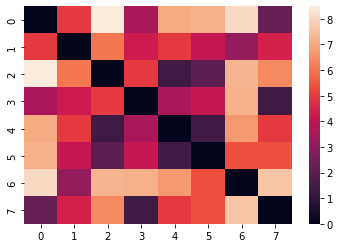

In [ ]:
#plotting distance matrix
sns.heatmap(arr)

My K-means implementation

In [ ]:
# function to calculate the distance of points from centroids
def calc_dist(X, centroids, n_clusters):
    distance = np.zeros((len(X), n_clusters))
    for k in range(n_clusters):
      row_norm = norm(X - centroids[k, :], axis=1)
      distance[:, k] = np.square(row_norm)
    return distance

In [ ]:
# function to compute centroids
def compute_centroids( X, labels, n_clusters):
    centroids = np.zeros((n_clusters, 2))
    for k in range(n_clusters):
      #print(X)
      li = list()
      for j in range(len(labels)):
        if labels[j]==k:
          li.append(X[j])
      x2 = np.array(li)
      centroids[k] = np.mean(x2, axis=0)
    return centroids

In [ ]:
# driver function for k-means algorithm
def k_means_implementation(centroids, n_clusters, X, iter):
  for i in range(iter):
    old_centroids = centroids
    distance = calc_dist(X, old_centroids, n_clusters)
    labels = np.argmin(distance, axis=1)
    centroids = compute_centroids(X, labels, n_clusters)
  return centroids, labels

In [ ]:
# for 1 iteration
c1 = np.array([points[0], points[3], points[6]])
centroids, labels = k_means_implementation(c1, 3, points, 1)
centroids

array([[ 2. , 10. ],
       [ 6. ,  6. ],
       [ 1.5,  3.5]])

In [ ]:
#using sklearn library
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, init=c1,max_iter=1)
km.fit(points)
km.cluster_centers_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  after removing the cwd from sys.path.


array([[ 2. , 10. ],
       [ 6. ,  6. ],
       [ 1.5,  3.5]])

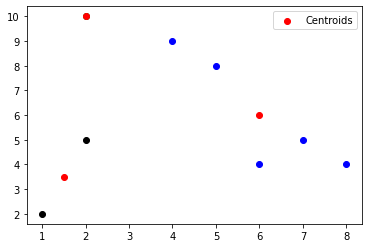

In [ ]:
plt.figure()
l1 = list()
l2 = list()
l3 = list()
for i in range(len(labels)):
  if labels[i]==0:
    l1.append(points[i])
  elif labels[i]==1:
    l2.append(points[i])
  else:
    l3.append(points[i])
l1 = np.array(l1)
l2 = np.array(l2)
l3 = np.array(l3)
plt.scatter(l1[:,0], l1[:,1], color='green')
plt.scatter(l2[:,0], l2[:,1], color='blue')
plt.scatter(l3[:,0], l3[:,1], color='black')
plt.scatter(centroids[:,0], centroids[:,1], color='red', label = 'Centroids')
plt.legend()
plt.show()

In [ ]:
# for 3 iterations
c1 = np.array([points[0], points[3], points[6]])
centroids, labels = k_means_implementation(c1, 3, points, 3)
centroids

array([[3.66666667, 9.        ],
       [7.        , 4.33333333],
       [1.5       , 3.5       ]])

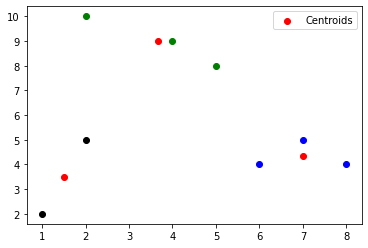

In [ ]:
plt.figure()
l1 = list()
l2 = list()
l3 = list()
for i in range(len(labels)):
  if labels[i]==0:
    l1.append(points[i])
  elif labels[i]==1:
    l2.append(points[i])
  else:
    l3.append(points[i])
l1 = np.array(l1)
l2 = np.array(l2)
l3 = np.array(l3)
plt.scatter(l1[:,0], l1[:,1], color='green')
plt.scatter(l2[:,0], l2[:,1], color='blue')
plt.scatter(l3[:,0], l3[:,1], color='black')
plt.scatter(centroids[:,0], centroids[:,1], color='red', label = 'Centroids')
plt.legend()
plt.show()

In [ ]:
# for 5 iterations
c1 = np.array([points[0], points[3], points[6]])
centroids, labels = k_means_implementation(c1, 3, points, 5)
centroids

array([[3.66666667, 9.        ],
       [7.        , 4.33333333],
       [1.5       , 3.5       ]])

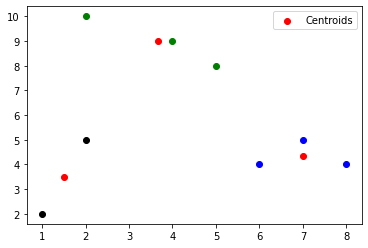

In [ ]:
plt.figure()
l1 = list()
l2 = list()
l3 = list()
for i in range(len(labels)):
  if labels[i]==0:
    l1.append(points[i])
  elif labels[i]==1:
    l2.append(points[i])
  else:
    l3.append(points[i])
l1 = np.array(l1)
l2 = np.array(l2)
l3 = np.array(l3)
plt.scatter(l1[:,0], l1[:,1], color='green')
plt.scatter(l2[:,0], l2[:,1], color='blue')
plt.scatter(l3[:,0], l3[:,1], color='black')
plt.scatter(centroids[:,0], centroids[:,1], color='red', label = 'Centroids')
plt.legend()
plt.show()

Minimum number of iterations for convergence is 3.

---
## **Q.2)**

In [ ]:
data1 = pd.read_excel('Question2a.xlsx', header=None)
data1

,0,1
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894
...,...,...
295,7.302787,3.380160
296,6.991984,2.987067
297,4.825534,2.779617
298,6.117681,2.854757


In [ ]:
data1= np.array(data1).reshape(len(data1),2)

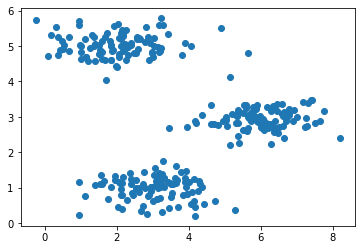

In [ ]:
plt.scatter(data1[:,0], data1[:,1])

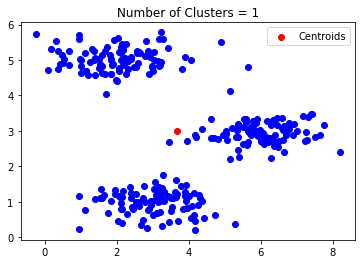

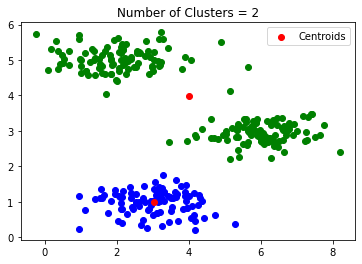

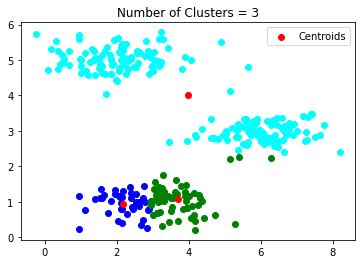

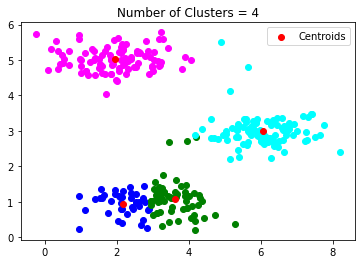

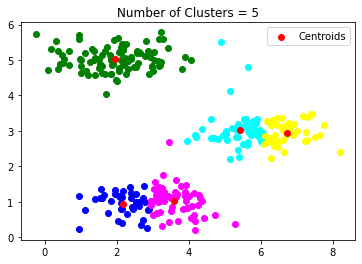

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
K = np.arange(1,6,1)
arr_c = list()
arr_l = list()
co = [ 'blue','green', 'cyan', 'magenta', 'yellow']
for k in K:
  ra = random.sample(range(0, 299), k)
  c1 = list()
  for i in ra:
    c1.append(data1[i])
  c1 = np.array(c1)
  centroids, labels = k_means_implementation(c1, k, data1, 100)        #100 iterations
  arr_c.append(centroids)
  arr_l.append(labels)
  plt.figure()
  l1 = []
  for i in range(k):
    l1.append([])
  for i in range(len(labels)):
    l1[labels[i]].append(data1[i])
  for i in range(k):
    x = np.array(l1[i]).reshape(len(l1[i]),2)
    plt.scatter(x[:,0], x[:,1], color=co[i])
  plt.scatter(centroids[:,0], centroids[:,1], color='red', label = 'Centroids')
  plt.legend()
  plt.title('Number of Clusters = %d'%k)
  plt.show()

arr_c = np.array(arr_c)
arr_l = np.array(arr_l)

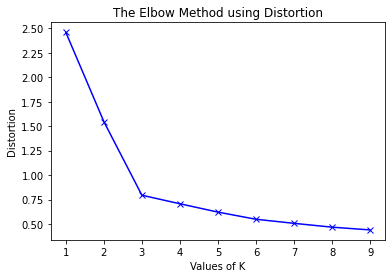

In [ ]:
# elbow method
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(data1)
	kmeanModel.fit(data1)

	distortions.append(sum(np.min(cdist(data1, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / data1.shape[0])
	inertias.append(kmeanModel.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

Optimal number of clusters : 3 

In [ ]:
data2 = pd.read_excel('Question2b.xls')
data2

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


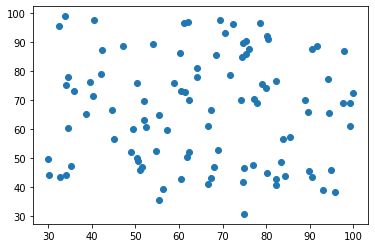

In [ ]:
x1 = np.array(data2['x1'])
x2 = np.array(data2['x2'])
X = np.c_[x1,x2]
plt.scatter(X[:,0], X[:,1])

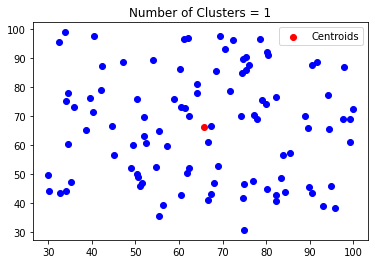

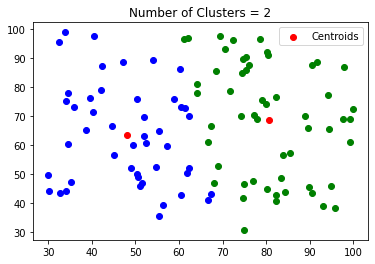

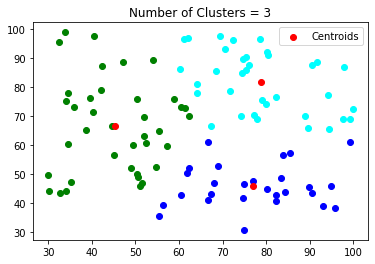

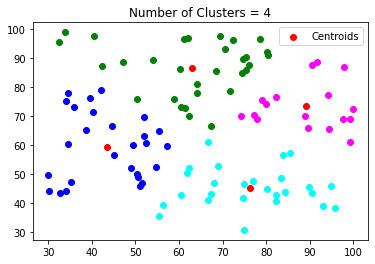

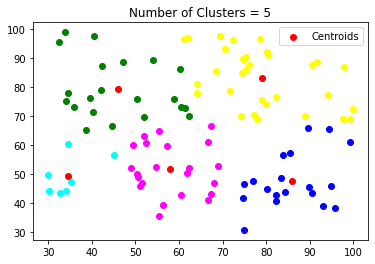

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
K = np.arange(1,6,1)
arr_c = list()
arr_l = list()
co = [ 'blue','green', 'cyan', 'magenta', 'yellow']
for k in K:
  ra = random.sample(range(0, len(X)-1), k)
  c1 = list()
  for i in ra:
    c1.append(X[i])
  c1 = np.array(c1)
  centroids, labels = k_means_implementation(c1, k, X, 100)        #100 iterations
  arr_c.append(centroids)
  arr_l.append(labels)
  plt.figure()
  l1 = []
  for i in range(k):
    l1.append([])
  for i in range(len(labels)):
    l1[labels[i]].append(X[i])
  for i in range(k):
    x = np.array(l1[i]).reshape(len(l1[i]),2)
    plt.scatter(x[:,0], x[:,1], color=co[i])
  plt.scatter(centroids[:,0], centroids[:,1], color='red', label = 'Centroids')
  plt.legend()
  plt.title('Number of Clusters = %d'%k)
  plt.show()

arr_c = np.array(arr_c)
arr_l = np.array(arr_l)

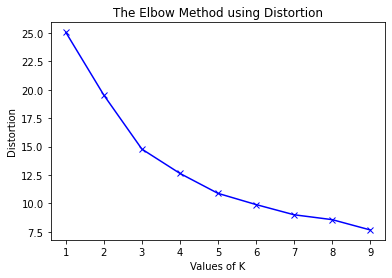

In [ ]:
from sklearn.cluster import KMeans
# elbow method
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(X)
	kmeanModel.fit(X)

	distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0])
	inertias.append(kmeanModel.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

Optimal number of clusters: 5

---
## **Q.3)**

In [ ]:
data = pd.read_csv('dataset3.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


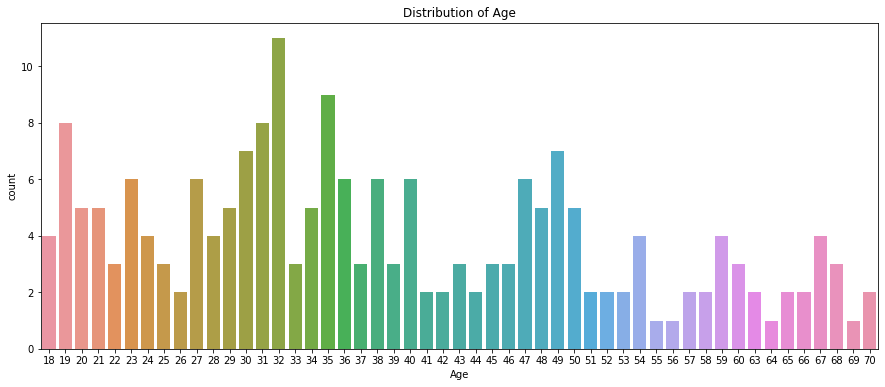

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data['Age'])
plt.title('Distribution of Age')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


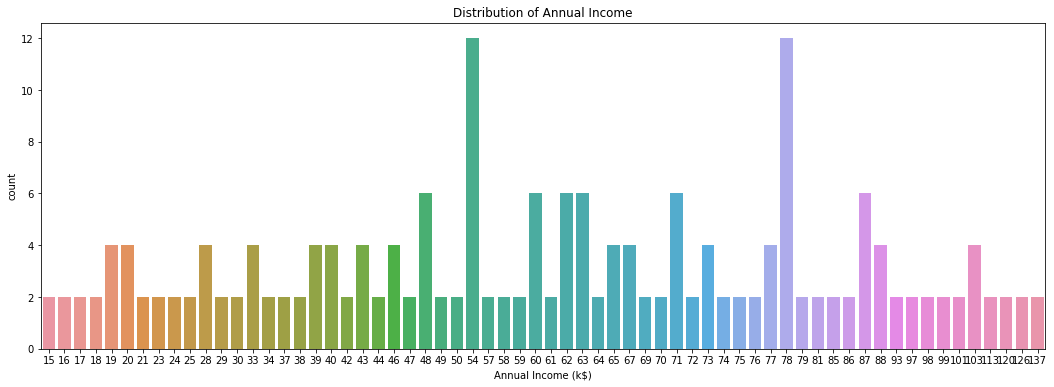

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


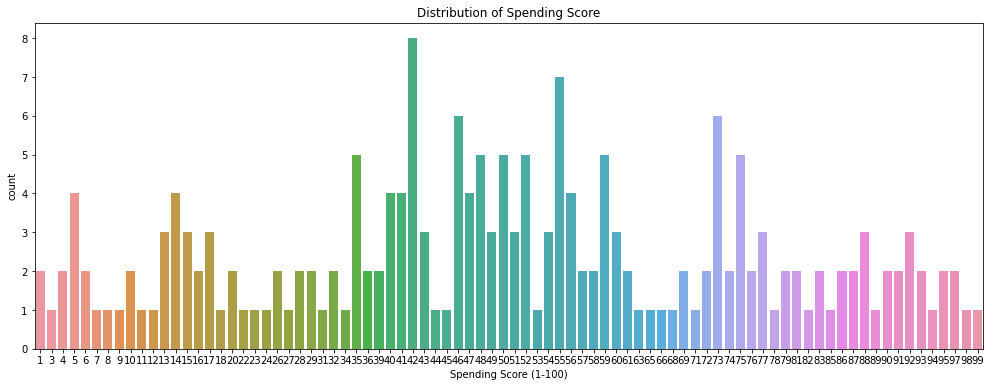

In [ ]:
plt.figure(figsize=(17,6))
sns.countplot(data['Spending Score (1-100)'])
plt.title('Distribution of Spending Score')
plt.show()

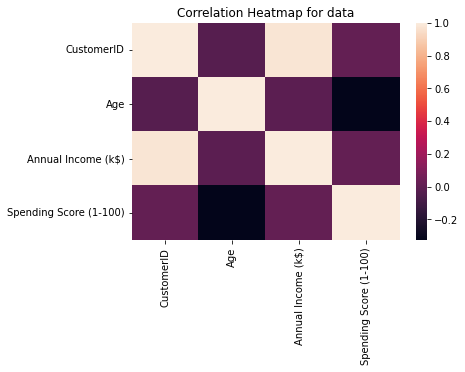

In [ ]:
plt.figure()
sns.heatmap(data.corr())
plt.title('Correlation Heatmap for data')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


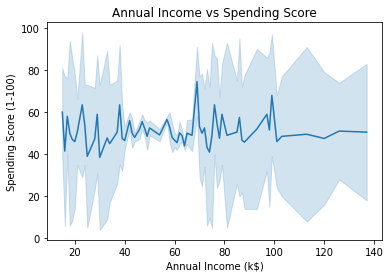

In [ ]:
x = data['Annual Income (k$)']
y = data['Spending Score (1-100)']

sns.lineplot(x, y)
plt.title('Annual Income vs Spending Score')
plt.show()

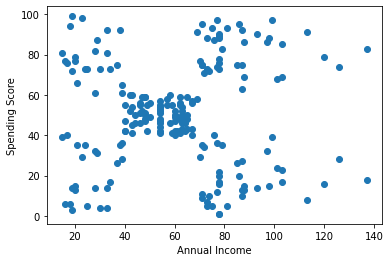

In [ ]:
plt.figure()
X = data.iloc[:, [3, 4]].values
plt.scatter(X[:,0], X[:,1])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

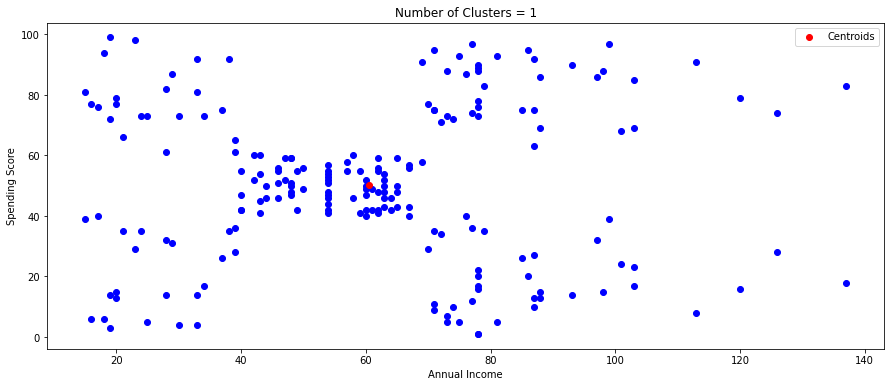

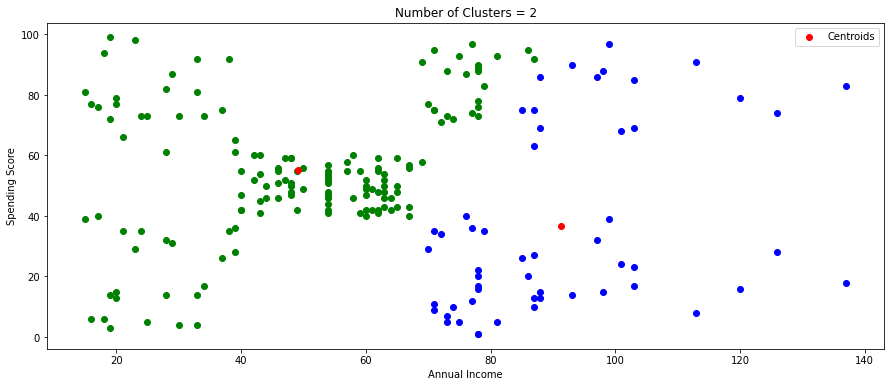

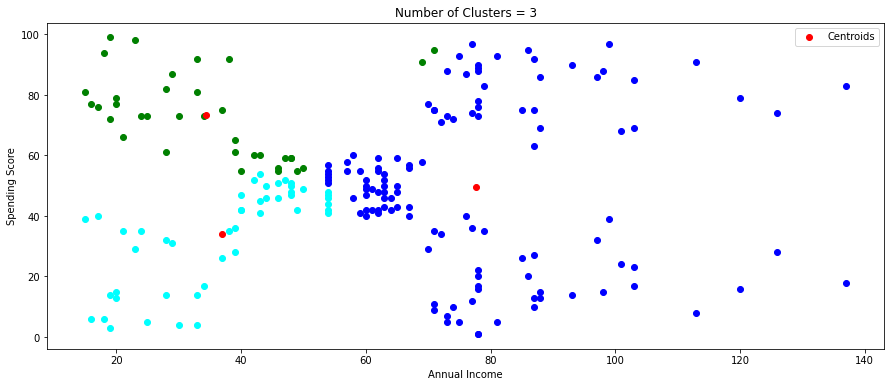

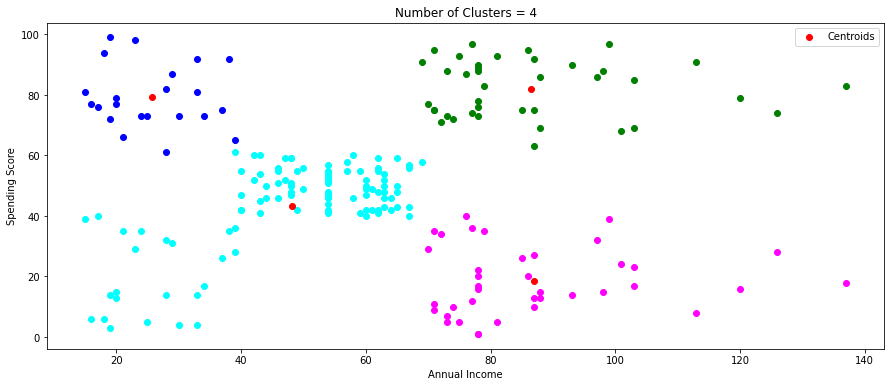

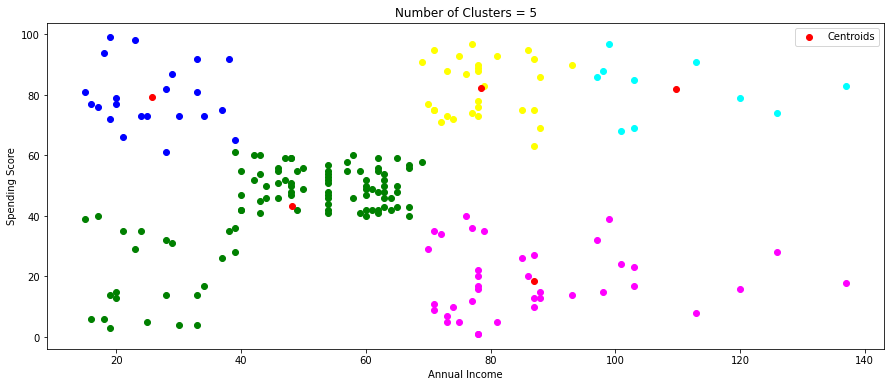

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
K = np.arange(1,6,1)
arr_c = list()
arr_l = list()
co = [ 'blue','green', 'cyan', 'magenta', 'yellow']
for k in K:
  ra = random.sample(range(0, len(X)-1), k)
  c1 = list()
  for i in ra:
    c1.append(X[i])
  c1 = np.array(c1)
  centroids, labels = k_means_implementation(c1, k, X, 100)        #100 iterations
  arr_c.append(centroids)
  arr_l.append(labels)
  plt.figure(figsize=(15,6))
  l1 = []
  for i in range(k):
    l1.append([])
  for i in range(len(labels)):
    l1[labels[i]].append(X[i])
  for i in range(k):
    x = np.array(l1[i]).reshape(len(l1[i]),2)
    plt.scatter(x[:,0], x[:,1], color=co[i])
  plt.scatter(centroids[:,0], centroids[:,1], color='red', label = 'Centroids')
  plt.legend()
  plt.title('Number of Clusters = %d'%k)
  plt.xlabel('Annual Income')
  plt.ylabel('Spending Score')
  plt.show()

arr_c = np.array(arr_c)
arr_l = np.array(arr_l)

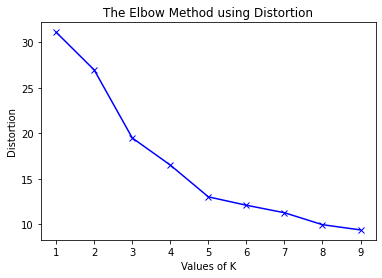

In [ ]:
from sklearn.cluster import KMeans
# elbow method
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(X)
	kmeanModel.fit(X)

	distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0])
	inertias.append(kmeanModel.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

Optimal number of clusters: 5